
# Cousera Machine Learning :  Applied Data Science Capstone Week 5

### Segmenting and Clustering Neighborhoods in both <a href="#item1">New York</a>   and <a href="#item1">Toronto</a>  cities

## Introduction
In this project, you will learn how to convert addresses into their equivalent **geographical location :** latitude and longitude values. By using the Foursquare API, you will  explore neighborhoods in New York and Toronto cities,  get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. You will use the *k*-means clustering algorithm to complete this task. Finally, you will use the Folium library to visualize the neighborhoods in New York City and Toronto and their emerging clusters.
You will particulary :
- Learn about clustering and  <a href="#item1">k-means clustering</a>  in particular.
- Learn how to use the  <a href="#item1">Foursquare API</a>  and clustering to segment and cluster the neighborhoods of Toronto's and New York's cities
- learn how to use python library  <a href="#item1">geocoder</a>   to explore a geographical location,
- Learn how to use the  <a href="#item1">Beautifulsoup</a>  Python package to scrape websites and parse HTML code.
- Learn how to use the visualization library, <a href="#item1">Folium</a>, to visualize the results.

### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset of New york's and Toronto's cities</a>

2. <a href="#item2">Explore Neighborhoods in New york's and Toronto's Cities</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

### Import necessary Libraries
##### Attention: geocoder  and Folium installation takes few minutes

In [1]:
import numpy as np 
import pandas as pd 
import bs4 as bs
import requests
import urllib.request
#!conda install -c conda-forge geocoder --yes # install geocoder packages 
import geocoder
import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium and geocoder installed')
print('Libraries imported.')

Folium and geocoder installed
Libraries imported.


### 1.  In this part , we directly download New york and Toronto data neighborhood with their geographical coordinates 


**Please noticed that if you want to see all steps of data preprocessing : scraping, cleaning, merge and aggregate both New york and Toronto ada data neighborhood you have 2 options:**

- 1st option ==>  go to : 
- 2nd option ==> see directly csv file which is the final result of the 1st option: https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Toronto_Neighborhoods.csv

In [486]:
#pd.read_csv('https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Toronto_Neighborhoods.csv',error_bad_lines=False)

In [487]:
data_all_cities = pd.read_csv("C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/NewYork_and_Toronto_Neighborhoods.csv")
data_all_cities.head()
print("#"*70)
print('            New York city has {} boroughs and {} neighborhoods'.format(len(data_all_cities[data_all_cities.City=="New York"]['Borough'].unique()),data_all_cities[data_all_cities.City=="New York"].shape[0]))
print('            Toronto  city has {} boroughs and {} neighborhoods'.format(len(data_all_cities[data_all_cities.City!="New York"]['Borough'].unique()),data_all_cities[data_all_cities.City!="New York"].shape[0]))

print("#"*70)
print("\n")
print("#"*70)
print("                     View somes rows of New york city")
print("#"*70)
print(data_all_cities[data_all_cities.City=="New York"].head(2).reset_index(drop=True))
print("\n")
print("#"*70)
print("                     View somes rows of Toronto city")
print("#"*70)
print(data_all_cities[data_all_cities.City!="New York"].head(2).reset_index(drop=True))



######################################################################
            New York city has 5 boroughs and 306 neighborhoods
            Canada  city has 10 boroughs and 103 neighborhoods
######################################################################


######################################################################
                     View somes rows of New york city
######################################################################
  Borough      City   Latitude  Longitude Neighborhood Postal Code
0   Bronx  New York  40.894705 -73.847201    Wakefield         XXX
1   Bronx  New York  40.874294 -73.829939   Co-op City         XXX


######################################################################
                     View somes rows of Toronto city
######################################################################
      Borough    City   Latitude  Longitude      Neighborhood Postal Code
0  North York  Canada  43.753259 -79.329656         Parkwoods 

#### Use python package  <a href="#item1">folium</a> to create map of those cities with neighborhoods 

#### Create function to automate the foluim map and  use geopy library to get the latitude and longitude values of  address .

In [4]:
def foluim_maps_plot(address,data, map_name_output):
    """
     This function create foluim map with specifics adress and add markers to the map
    """
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of the adress: {} are {}, {}.'.format(address, latitude, longitude))
    map_plot = folium.Map(location=[latitude, longitude], zoom_start=10)
    # add markers to map
    for lat, lng, borough, neighborhood, color_map in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood'],data['color_map']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker([lat, lng],radius=5,popup=label,color=color_map,fill=True,fill_color=color_map,fill_opacity=0.7,parse_html=False).add_to(map_plot)  
        map_plot.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/'+map_name_output+'.html')
    return(map_plot)


In [5]:
# create map for city with different color 
data_all_cities["color_map"]="blue"
data_all_cities.loc[data_all_cities.City=="New York", "color_map"] ="Red"
New_york_map = foluim_maps_plot('New York City, NY',data_all_cities[data_all_cities.City=="New York"].reset_index(drop=True), "New_york_foluim")
Toronto_map = foluim_maps_plot('Toronto, CA',data_all_cities[data_all_cities.City!="New York"].reset_index(drop=True), "Toronto_foluim")
#New_york_and_Toronto_map = foluim_maps_plot('New York City, NY',data_all_cities, "New_york_and_Toronto_foluim")


The geograpical coordinate of the adress: New York City, NY are 40.7127281, -74.0060152.
The geograpical coordinate of the adress: Toronto, CA are 43.6534817, -79.3839347.


In [6]:
# see new york maps
New_york_map

In [7]:
# see Toronto maps
Toronto_map

### Because I have difficults to add maps to the jupyter notebook , please for seeing this map card you have 2 options:
#### 1 : please download this html :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_map.html


#### 2 :  load the file on :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_map.PNG

### 2. Explore Neighborhoods in New york's and Toronto's Cities by using Foursquare API

In [8]:
#### Define Foursquare Credentials and Version
#### PLease Enter your CLIENT_ID and CLIENT_SECRET of Foursquare account
CLIENT_ID = '314YBJLU4OIPE42UU1GKC4RQ0B3DBC5EAEUD1MIKT2UJBKGA' # your Foursquare ID
CLIENT_SECRET = 'H5YXFFMIK5TRO2PKH3VYQRH2RD4CYKDMDFA04A54WEFY3XTT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT= 100


In [9]:
def getNearbyVenues(city, names, latitudes, longitudes, radius=500):
    venues_list=[]
    for city, name, lat, lng in zip(city, names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(city, name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City','Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

##### Let's apply the function to explore the venue in both the 2 cities

In [12]:
data_all_cities_venues = getNearbyVenues(city=data_all_cities["City"], names=data_all_cities['Neighborhood'],latitudes=data_all_cities['Latitude'],longitudes=data_all_cities['Longitude'])
#data_all_cities_venues.to_csv("C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/data_all_cities_venues.csv")

##### Let's check how many venues were returned for each neighborhood and how many unique categories can be curated from all the returned venues

In [13]:
print("#"*80)
print('                    {} venues were returned by Foursquare API.'.format(data_all_cities_venues.shape[0]))
print("#"*80)
print("\n")
print("#"*80)
print('                    There are {} uniques categories.'.format(len(data_all_cities_venues['Venue Category'].unique())))
print("#"*80)
print("\n")
print("                    number of venues for each Neighborhood  ")
print("#"*80)
print(data_all_cities_venues.groupby(by =['Neighborhood', "City"])["Venue Category"].count().reset_index().rename(columns={"Venue Category":"number of venues"}))
print("#"*80)
print("\n")
print("                    data_all_cities_venues head   ")
print("#"*120)
data_all_cities_venues.head()

################################################################################
                    12025 venues were returned by Foursquare API.
################################################################################


################################################################################
                    There are 457 uniques categories.
################################################################################


                    number of venues for each Neighborhood  
################################################################################
               Neighborhood      City  number of venues
0                 Agincourt   Toronto                 4
1    Alderwood, Long Branch   Toronto                 9
2                  Allerton  New York                31
3                  Annadale  New York                 8
4             Arden Heights  New York                 6
..                      ...       ...               ...
388               

,City,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,New York,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,New York,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,New York,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,New York,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


###  3: Analyze Each Neighborhood

#### To  analyze Each Neighborhood , you start by spliting the results of Neighborhood by city  and  the reason is to apply one hot encoding on the *Venue Category*  variable for each city separatly. In this way , you make sure   you will not increase the number of columns in this process. 

Toronto data set one hot encoding

In [17]:
data_Toronto_venues = data_all_cities_venues[data_all_cities_venues.City=="Toronto"]
data_Toronto_onehot = pd.get_dummies(data_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
data_Toronto_onehot['Neighborhood'] = data_Toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [data_Toronto_onehot.columns[-1]] + list(data_Toronto_onehot.columns[:-1])
data_Toronto_onehot = data_Toronto_onehot[fixed_columns]
print('Toronto  one hot encoding new dataframe size are: {} '.format(data_Toronto_onehot.shape))
data_Toronto_onehot.head()
print("\n")

Toronto  one hot encoding new dataframe size are: (2127, 275) 




New York data set one hot encoding

In [16]:
data_NewYork_venues = data_all_cities_venues[data_all_cities_venues.City=="New York"]
data_NewYork_onehot = pd.get_dummies(data_NewYork_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
data_NewYork_onehot['Neighborhood'] = data_NewYork_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [data_NewYork_onehot.columns[-1]] + list(data_NewYork_onehot.columns[:-1])
data_NewYork_onehot = data_NewYork_onehot[fixed_columns]
print('New york one hot encoding new dataframe size are: {} '.format(data_NewYork_onehot.shape))
data_NewYork_onehot.head()
print("\n")

New york one hot encoding new dataframe size are: (9898, 427) 




#### Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [18]:
data_Toronto_grouped = data_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
print('Toronto dataframe size are: {} '.format(data_Toronto_grouped.shape))
print("\n")
data_NewYork_grouped = data_NewYork_onehot.groupby('Neighborhood').mean().reset_index()
print('New york dataframe size are: {} '.format(data_NewYork_grouped.shape))
print("\n")

Toronto dataframe size are: (93, 275) 


New york dataframe size are: (300, 427) 




#### Let's print each neighborhood along with the top 5 most common venues for the 2 cities

The top 5 most common venues for Toronto

In [19]:
num_top_venues = 5

for hood in data_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_Toronto_grouped[data_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1               Skating Rink  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4                Yoga Studio  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.22
1  Skating Rink  0.11
2   Coffee Shop  0.11
3           Pub  0.11
4  Dance Studio  0.11


----Bathurst Manor, Wilson Heights, Downsview North----
            venue  freq
0     Coffee Shop  0.09
1            Bank  0.09
2  Ice Cream Shop  0.04
3     Supermarket  0.04
4      Restaurant  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.08
1           Sandwich Place  0.08
2              Coffee Shop  0.08
3               Restaurant  0

                           venue  freq
0                            Bar  0.09
1                    Coffee Shop  0.07
2               Asian Restaurant  0.07
3                     Restaurant  0.07
4  Vegetarian / Vegan Restaurant  0.04


----Malvern, Rouge----
                             venue  freq
0                       Print Shop   0.5
1             Fast Food Restaurant   0.5
2                    Metro Station   0.0
3  Molecular Gastronomy Restaurant   0.0
4       Modern European Restaurant   0.0


----Milliken, Agincourt North, Steeles East, L'Amoreaux East----
                             venue  freq
0                       Playground   0.5
1                             Park   0.5
2                      Yoga Studio   0.0
3                    Metro Station   0.0
4  Molecular Gastronomy Restaurant   0.0


----Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West----
                  venue  freq
0  Fast Food Restaurant  0.07
1         Grocery

The top 5 most common venues for New York

In [20]:
num_top_venues = 5

for hood in data_NewYork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_NewYork_grouped[data_NewYork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0           Pizza Place  0.16
1         Deli / Bodega  0.10
2           Supermarket  0.06
3           Gas Station  0.03
4  Fast Food Restaurant  0.03


----Annadale----
           venue  freq
0    Pizza Place  0.38
1   Dance Studio  0.12
2     Restaurant  0.12
3     Sports Bar  0.12
4  Train Station  0.12


----Arden Heights----
           venue  freq
0       Pharmacy  0.17
1  Deli / Bodega  0.17
2    Pizza Place  0.17
3    Coffee Shop  0.17
4       Bus Stop  0.17


----Arlington----
                 venue  freq
0                 Food  0.14
1          Coffee Shop  0.14
2         Intersection  0.14
3  American Restaurant  0.14
4        Deli / Bodega  0.14


----Arrochar----
                venue  freq
0            Bus Stop  0.12
1  Italian Restaurant  0.08
2       Deli / Bodega  0.08
3         Pizza Place  0.08
4          Nail Salon  0.04


----Arverne----
             venue  freq
0        Surf Spot  0.22
1   Sandwich Place  0.11
2    Metro

4  Yoga Studio  0.03


----College Point----
                       venue  freq
0         Chinese Restaurant  0.10
1              Deli / Bodega  0.07
2                Pizza Place  0.05
3                        Bar  0.05
4  Latin American Restaurant  0.05


----Concord----
                  venue  freq
0         Deli / Bodega  0.22
1                  Park  0.11
2  Gym / Fitness Center  0.11
3         Train Station  0.11
4         Grocery Store  0.11


----Concourse----
                 venue  freq
0        Deli / Bodega  0.14
1        Grocery Store  0.11
2  Fried Chicken Joint  0.07
3               Bakery  0.07
4       Ice Cream Shop  0.04


----Concourse Village----
                  venue  freq
0         Deli / Bodega  0.11
1  Fast Food Restaurant  0.09
2        Sandwich Place  0.09
3    Mexican Restaurant  0.06
4   Sporting Goods Shop  0.06


----Coney Island----
                  venue  freq
0      Baseball Stadium  0.20
1  Caribbean Restaurant  0.13
2   Monument / Landmark  0.07
3 

                venue  freq
0            Pharmacy  0.19
1                Bank  0.05
2          Donut Shop  0.05
3  Falafel Restaurant  0.05
4   Mobile Phone Shop  0.05


----Glendale----
               venue  freq
0            Brewery  0.14
1  Food & Drink Shop  0.14
2               Park  0.14
3        Pizza Place  0.14
4        Bus Station  0.14


----Gowanus----
                    venue  freq
0                     Bar  0.08
1  Furniture / Home Store  0.06
2      Italian Restaurant  0.06
3             Pizza Place  0.03
4               Wine Shop  0.03


----Gramercy----
                venue  freq
0          Bagel Shop  0.06
1  Italian Restaurant  0.05
2                 Bar  0.05
3         Pizza Place  0.05
4         Coffee Shop  0.05


----Graniteville----
               venue  freq
0         Food Truck  0.25
1      Grocery Store  0.25
2     Sandwich Place  0.25
3           Bus Stop  0.25
4  Outdoor Sculpture  0.00


----Grant City----
                  venue  freq
0  Fast Food Resta

            venue  freq
0            Café  0.22
1  Sandwich Place  0.11
2      Playground  0.11
3     Pizza Place  0.11
4        Bus Stop  0.11


----Manhattan Terrace----
            venue  freq
0     Pizza Place  0.12
1      Donut Shop  0.12
2  Ice Cream Shop  0.12
3     Coffee Shop  0.04
4  Cosmetics Shop  0.04


----Manhattan Valley----
                venue  freq
0         Coffee Shop  0.11
1                 Bar  0.05
2  Mexican Restaurant  0.05
3         Pizza Place  0.05
4         Yoga Studio  0.03


----Manhattanville----
                venue  freq
0         Coffee Shop  0.09
1  Seafood Restaurant  0.07
2  Mexican Restaurant  0.05
3    Sushi Restaurant  0.05
4  Chinese Restaurant  0.05


----Manor Heights----
                venue  freq
0          Bagel Shop  0.18
1        Liquor Store  0.18
2       Deli / Bodega  0.18
3  Chinese Restaurant  0.09
4          Campground  0.09


----Marble Hill----
                 venue  freq
0       Sandwich Place  0.11
1          Coffee Shop  

                 venue  freq
0          Supermarket  0.15
1          Pizza Place  0.09
2           Kids Store  0.06
3  American Restaurant  0.06
4   Chinese Restaurant  0.06


----Pelham Bay----
                  venue  freq
0    Italian Restaurant  0.09
1                  Bank  0.07
2  Fast Food Restaurant  0.07
3                Lawyer  0.05
4        Sandwich Place  0.05


----Pelham Gardens----
                venue  freq
0         Pizza Place   0.1
1         Bus Station   0.1
2            Pharmacy   0.1
3  Chinese Restaurant   0.1
4          Donut Shop   0.1


----Pelham Parkway----
                venue  freq
0         Pizza Place  0.09
1  Italian Restaurant  0.09
2  Frozen Yogurt Shop  0.09
3  Chinese Restaurant  0.09
4               Plaza  0.04


----Pleasant Plains----
            venue  freq
0      Donut Shop  0.13
1         Brewery  0.07
2  Ice Cream Shop  0.07
3        Bus Stop  0.07
4     Flower Shop  0.07


----Pomonok----
            venue  freq
0     Supermarket  0.12
1  

4    Pet Service  0.06


----Sunnyside----
                       venue  freq
0                Pizza Place  0.10
1              Grocery Store  0.06
2         Chinese Restaurant  0.06
3                     Bakery  0.06
4  South American Restaurant  0.06


----Sunnyside Gardens----
                venue  freq
0                 Bar  0.06
1       Grocery Store  0.05
2         Pizza Place  0.04
3   Korean Restaurant  0.03
4  Turkish Restaurant  0.03


----Sunset Park----
                       venue  freq
0                     Bakery  0.08
1                       Bank  0.08
2  Latin American Restaurant  0.08
3         Mexican Restaurant  0.08
4                Pizza Place  0.08


----Sutton Place----
                  venue  freq
0                   Gym  0.05
1           Coffee Shop  0.05
2  Gym / Fitness Center  0.05
3                  Park  0.04
4    Italian Restaurant  0.04


----Throgs Neck----
                venue  freq
0  Italian Restaurant  0.09
1          Sports Bar  0.09
2         

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [23]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_Toronto_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_NewYork_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_Toronto_sorted['Neighborhood'] = data_Toronto_grouped['Neighborhood']
neighborhoods_venues_NewYork_sorted['Neighborhood'] = data_NewYork_grouped['Neighborhood']

for ind in np.arange(data_Toronto_grouped.shape[0]):
    neighborhoods_venues_Toronto_sorted.iloc[ind, 1:] = return_most_common_venues(data_Toronto_grouped.iloc[ind, :], num_top_venues)

for ind in np.arange(neighborhoods_venues_NewYork_sorted.shape[0]):
    neighborhoods_venues_NewYork_sorted.iloc[ind, 1:] = return_most_common_venues(data_NewYork_grouped.iloc[ind, :], num_top_venues)

    
#print(neighborhoods_venues_Toronto_sorted.head())
print('\n')
#print(neighborhoods_venues_NewYork_sorted.head(2))

###  III: Cluster Neighborhoods and maps them


Run *k*-means to cluster the neighborhood into k clusters.
First, let's determine a optimal number of clusters for the two cities

Let's start with Toronto clustering

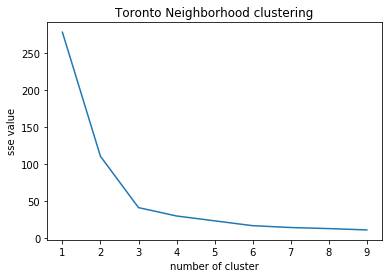

In [122]:
sse = {}
data_Toronto_grouped_without_Neighborhood = data_Toronto_grouped.drop('Neighborhood', 1)
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_Toronto_grouped_without_Neighborhood)
    data_Toronto_grouped['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("number of cluster")
plt.ylabel("sse value")
plt.title("Toronto Neighborhood clustering")
plt.show()


Now define New York clustering

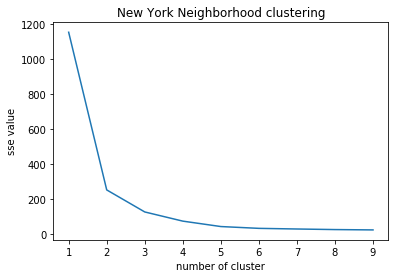

In [124]:
sse = {}
data_NewYork_grouped_without_Neighborhood = data_NewYork_grouped.drop('Neighborhood', 1)
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_NewYork_grouped_without_Neighborhood)
    data_NewYork_grouped['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.ylabel("sse value")
plt.title("New York Neighborhood clustering")
plt.xlabel("number of cluster")
plt.show()

With Elbow method as you see optimum number of clusters is 3 for both 2 cities( Realy, We have 3 clusters in Toronto's city and 4 in New York but for homogenity and business neededs we decide to fixe 3 clusters )

In [35]:
# set number of clusters
# run k-means clustering
# check cluster labels generated for each row in the dataframe
kclusters = 3
kmeans_Toronto = KMeans(n_clusters=kclusters, random_state=0).fit(data_Toronto_grouped_without_Neighborhood)
print(kmeans_Toronto.labels_[0:10]) 
kmeans_NewYork = KMeans(n_clusters=kclusters, random_state=0).fit(data_NewYork_grouped_without_Neighborhood)
print(kmeans_NewYork.labels_[0:10])


[0 2 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 1 0 1 0]


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

Let's start with Totonto's city

In [36]:
# add clustering labels
neighborhoods_venues_Toronto_sorted.insert(0, 'Cluster Labels', kmeans_Toronto.labels_)
data_Toronto_merged = data_all_cities[data_all_cities.City!="New York"]
# merge Toronto_grouped with Toronto_data to add latitude/longitude for each neighborhood
data_Toronto_merged = data_Toronto_merged.join(neighborhoods_venues_Toronto_sorted.set_index('Neighborhood'), on='Neighborhood')
data_Toronto_merged.head(3) # check the last columns!

,Borough,City,Latitude,Longitude,Neighborhood,Postal Code,color_map,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
306,North York,Toronto,43.753259,-79.329656,Parkwoods,M3A,blue,0.0,Park,Food & Drink Shop,Women's Store,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
307,North York,Toronto,43.725882,-79.315572,Victoria Village,M4A,blue,0.0,Hockey Arena,French Restaurant,Coffee Shop,Pizza Place,Intersection,Portuguese Restaurant,Women's Store,Deli / Bodega,Department Store,Dessert Shop
308,Downtown Toronto,Toronto,43.654260,-79.360636,"Regent Park, Harbourfront",M5A,blue,0.0,Coffee Shop,Bakery,Pub,Park,Café,Breakfast Spot,Restaurant,Theater,Yoga Studio,Chocolate Shop


Let's do the same for New York's city

In [37]:
# add clustering labels
neighborhoods_venues_NewYork_sorted.insert(0, 'Cluster Labels', kmeans_NewYork.labels_)
data_NewYork_merged = data_all_cities[data_all_cities.City=="New York"]
# merge NewYork_grouped with NewYork_data to add latitude/longitude for each neighborhood
data_NewYork_merged = data_NewYork_merged.join(neighborhoods_venues_NewYork_sorted.set_index('Neighborhood'), on='Neighborhood')
data_NewYork_merged.head(3) # check the last columns!

,Borough,City,Latitude,Longitude,Neighborhood,Postal Code,color_map,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,New York,40.894705,-73.847201,Wakefield,XXX,Red,0.0,Pharmacy,Ice Cream Shop,Donut Shop,Sandwich Place,Laundromat,Dessert Shop,Gas Station,Women's Store,Factory,Empanada Restaurant
1,Bronx,New York,40.874294,-73.829939,Co-op City,XXX,Red,0.0,Bus Station,Discount Store,Restaurant,Grocery Store,Park,Bagel Shop,Mattress Store,Gift Shop,Salon / Barbershop,Trail
2,Bronx,New York,40.887556,-73.827806,Eastchester,XXX,Red,1.0,Bus Station,Caribbean Restaurant,Diner,Bus Stop,Deli / Bodega,Seafood Restaurant,Bowling Alley,Fast Food Restaurant,Metro Station,Bakery


#### Now we have the cluster as well as the top 10 venues for each neighborhood in each Borough of the 2 cities  let's aggregate them in one dataframe. Thus we can use foluim to create map 

In [39]:
data_cluster_final_all_cities = pd.concat([data_NewYork_merged, data_Toronto_merged], axis=0)
data_cluster_final_all_cities = data_cluster_final_all_cities.reset_index(drop=True)
data_cluster_final_all_cities =data_cluster_final_all_cities[data_cluster_final_all_cities["Cluster Labels"].isnull()==False]
data_cluster_final_all_cities["Cluster Labels"]= data_cluster_final_all_cities["Cluster Labels"].astype("int")
data_cluster_final_all_cities.head()


,Borough,City,Latitude,Longitude,Neighborhood,Postal Code,color_map,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,New York,40.894705,-73.847201,Wakefield,XXX,Red,0,Pharmacy,Ice Cream Shop,Donut Shop,Sandwich Place,Laundromat,Dessert Shop,Gas Station,Women's Store,Factory,Empanada Restaurant
1,Bronx,New York,40.874294,-73.829939,Co-op City,XXX,Red,0,Bus Station,Discount Store,Restaurant,Grocery Store,Park,Bagel Shop,Mattress Store,Gift Shop,Salon / Barbershop,Trail
2,Bronx,New York,40.887556,-73.827806,Eastchester,XXX,Red,1,Bus Station,Caribbean Restaurant,Diner,Bus Stop,Deli / Bodega,Seafood Restaurant,Bowling Alley,Fast Food Restaurant,Metro Station,Bakery
3,Bronx,New York,40.895437,-73.905643,Fieldston,XXX,Red,0,River,Plaza,Women's Store,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
4,Bronx,New York,40.890834,-73.912585,Riverdale,XXX,Red,0,Bus Station,Park,Food Truck,Bank,Baseball Field,Gym,Plaza,Home Service,Falafel Restaurant,English Restaurant


Finally, let's visualize the resulting clusters for each city

Let's start for Toronto city

In [65]:
# create map
geolocator = Nominatim(user_agent="ny_explorer")
address = "Toronto, CA"
#address = "New York City, NY"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster_final_all_cities['Latitude'], data_cluster_final_all_cities['Longitude'], data_cluster_final_all_cities['Neighborhood'], data_cluster_final_all_cities['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Toronto)
       

map_clusters_Toronto.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/map_clusters_Toronto.html')
map_clusters_Toronto

In [41]:
# create map
geolocator = Nominatim(user_agent="ny_explorer")
address = "New York City, NY"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster_final_all_cities['Latitude'], data_cluster_final_all_cities['Longitude'], data_cluster_final_all_cities['Neighborhood'], data_cluster_final_all_cities['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_NewYork)
       

map_clusters_NewYork.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/map_clusters_NewYork.html')
map_clusters_NewYork

### Because I have difficults to add maps to the jupyter notebook , please for seeing this map card you have 2 options:
#### 1 : please download this html :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_Cluster_map.html


#### 2 :  load the file on :
https://github.com/iamadouhassane/Coursera_ML_Capstone_week_3/blob/master/Toronto_Neighborhoods_Cluster_map.PNG

### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. 
<br/>  **Pay attention , you can't compare cluster 1 in Toronto with cluster 1 in New York. Even if it is the same cluster name in the 2 cities, it remains only a name and not a certain form of similarity or dissimilarity in this same the cluster 1 . It has no sens because the clustering was done separatly. The consequence of this approach is that cluster 1 in New York may perhaps correspond to cluster 2 or cluster 3 in Toronto.  In the same idea cluster 2 with cluster 2 etcs... To do this is an error and the probability is low for this schema :**
<br/> cluster1(Toronto) = cluster1(New York)
<br/> cluster2(Toronto) = cluster2(New York)
<br/> cluster3(Toronto) = cluster3(New York)

**At this level we only retain the fact that each city has 3 clusters and that these 3 clusters are differents taking into account their physical measures. But within a cluster, individuals have similarities. A more in-depth analysis on each cluster of each city, could perhaps give us more details on the correspondence of the clusters. Cluster 1 in Toronto corresponds in which cluster in New York? This is an simple hypothesis**

<br/>So let's define the cluster  to analyze them


##### Cluster 1

In [42]:
cluster1 = data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 0, data_cluster_final_all_cities.columns[[0]+[1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster1.shape[0]) + " rows")
print("\n")
cluster1.head()

This cluster has 207 rows




,Borough,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,New York,0,Pharmacy,Ice Cream Shop,Donut Shop,Sandwich Place,Laundromat,Dessert Shop,Gas Station,Women's Store,Factory,Empanada Restaurant
1,Bronx,New York,0,Bus Station,Discount Store,Restaurant,Grocery Store,Park,Bagel Shop,Mattress Store,Gift Shop,Salon / Barbershop,Trail
2,Bronx,New York,0,River,Plaza,Women's Store,Farm,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
3,Bronx,New York,0,Bus Station,Park,Food Truck,Bank,Baseball Field,Gym,Plaza,Home Service,Falafel Restaurant,English Restaurant
4,Bronx,New York,0,Pizza Place,Bar,Latin American Restaurant,Mexican Restaurant,Sandwich Place,Bakery,Supermarket,Spanish Restaurant,Fast Food Restaurant,Chinese Restaurant


##### Cluster 2

In [43]:
cluster2= data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 1, data_cluster_final_all_cities.columns[[0]+ [1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster2.shape[0]) + " rows")
print("\n")
cluster2.head()

This cluster has 164 rows




,Borough,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,New York,1,Bus Station,Caribbean Restaurant,Diner,Bus Stop,Deli / Bodega,Seafood Restaurant,Bowling Alley,Fast Food Restaurant,Metro Station,Bakery
1,Bronx,New York,1,Deli / Bodega,Playground,Bar,Food & Drink Shop,Pizza Place,Grocery Store,Trail,Train Station,Donut Shop,Park
2,Bronx,New York,1,Nightclub,Supermarket,Caribbean Restaurant,Dance Studio,Soup Place,Bar,Convenience Store,Entertainment Service,Farm,Ethiopian Restaurant
3,Bronx,New York,1,Harbor / Marina,Seafood Restaurant,Thrift / Vintage Store,French Restaurant,History Museum,Music Venue,Smoke Shop,Boat or Ferry,Grocery Store,Baseball Field
4,Bronx,New York,1,Diner,Grocery Store,Donut Shop,Deli / Bodega,Sandwich Place,Fast Food Restaurant,Latin American Restaurant,Falafel Restaurant,English Restaurant,Entertainment Service


##### Cluster 3

In [68]:
cluster3= data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 2, data_cluster_final_all_cities.columns[[0]+ [1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster3.shape[0]) + " rows")
print("\n")
cluster3.head()

This cluster has 31 rows




,Borough,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,New York,2,Pool,Women's Store,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
1,Brooklyn,New York,2,Bus Station,Construction & Landscaping,Spa,Beach,Farmers Market,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space
2,Queens,New York,2,Trail,Monument / Landmark,Beach,Women's Store,Farm,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service
3,Queens,New York,2,Beach,Ice Cream Shop,Fast Food Restaurant,BBQ Joint,Metro Station,Arepa Restaurant,Food Truck,Latin American Restaurant,Deli / Bodega,Pizza Place
4,Queens,New York,2,Beach,Women's Store,Farmers Market,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit


Now that you have defined clusters, let's create a new dataframe whitch is the transformation of the dataframe that containts all clusters and called it **data_clusters_new**. This is an important step to facilitate calculations, to determine the discriminating venue categories that distinguish each cluster and to visualize the results

In [360]:
data_clusters_new = pd.DataFrame()
important_columns = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']
for i in important_columns :
    df_ = data_cluster_final_all_cities[["Borough","City", "Cluster Labels", i]].rename(columns={i:"Common Venue"})
    df_["Position on the :"] = i
    data_clusters_new = pd.concat([data_clusters_new, df_], axis=0)

data_clusters_new = data_clusters_new.reset_index(drop=True)
print("data_clusters_new has: "+str(data_clusters_new.shape) + " dimensions")
print("\n")
data_clusters_new.head()

data_clusters_new has: (4020, 5) dimensions




,Borough,City,Cluster Labels,Common Venue,Position on the :
0,Bronx,New York,0,Pharmacy,1st Most Common Venue
1,Bronx,New York,0,Bus Station,1st Most Common Venue
2,Bronx,New York,1,Bus Station,1st Most Common Venue
3,Bronx,New York,0,River,1st Most Common Venue
4,Bronx,New York,0,Bus Station,1st Most Common Venue


##### analysis approach 1 :  analysis with **City** and **Cluster Labels**
In this analysis approach you will determine the discriminating venue categories that distinguish each cluster by using only **City** and **Cluster Labels** variables. Through this first analysis, we will be able to identify the most important common  venue in the clusters of each city by calculating **their occurrence.** Finally, you plot the result to figure out the pertinence of analysis 

In [452]:
analysis_approach_1  = data_clusters_new.merge(data_clusters_new.groupby(by = ["City", "Cluster Labels", "Common Venue"]).apply(lambda x:x.shape[0]).reset_index().rename(columns={0:"Occurrence"}).sort_values(by = ["City", "Cluster Labels", "Occurrence"]))
analysis_approach_1["City_Cluster"] =analysis_approach_1["City"].astype('str') + '_city_and_cluster_' + analysis_approach_1['Cluster Labels'].astype('str')
analysis_approach_1.head()

,Borough,City,Cluster Labels,Common Venue,Position on the :,Occurrence,City_Cluster
0,Bronx,New York,0,Pharmacy,1st Most Common Venue,42,New York_city_and_cluster_0
1,Brooklyn,New York,0,Pharmacy,1st Most Common Venue,42,New York_city_and_cluster_0
2,Queens,New York,0,Pharmacy,1st Most Common Venue,42,New York_city_and_cluster_0
3,Queens,New York,0,Pharmacy,1st Most Common Venue,42,New York_city_and_cluster_0
4,Queens,New York,0,Pharmacy,1st Most Common Venue,42,New York_city_and_cluster_0


In [485]:
for City_Cluster in analytical_approach_1["City_Cluster"].unique():
    df = analysis_approach_1[analysis_approach_1.City_Cluster==City_Cluster].sort_values("Occurrence",ascending=False)
    city = df.City.unique()[0]
    cluster = df["Cluster Labels"].unique()[0]
    indice = df[["City_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
    df = df.merge(indice)
    Venue_cat = pd.Categorical(df['Common Venue'], categories=df['Common Venue'].value_counts().index.tolist())
    df = df.assign(Venue_cat = Venue_cat)
    p = (
    ggplot(df)
    + geom_bar(aes(x='Venue_cat',fill='Occurrence'), show_legend=True,size=2)
    + coord_flip()
    + theme_classic()
    + xlab("Common venue") 
    + ylab("Frequency") 
    + ggtitle("   The most importants common venues in {} 's cluster {}".format(city, cluster)))
    file_path = "C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/"
    p.save(file_path+ City_Cluster+'.png')
    


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/New York_city_and_cluster_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/New York_city_and_cluster_1.png
  warn('Filename: {}'.format(filename), Plotnin

##### analysis approach 2 :  analysis with **City, Borough and Cluster Labels**
In this analysis approach you will determine the discriminating venue categories that distinguish each cluster by using **City, Borough and Cluster Labels** variables. Through this second analysis, we will complete the first analysis by **adding granularity**.In this way ,we will be able to identify the most important common  venue in the clusters of each Borough in the city by calculating **their occurrence.** Finally, you plot the result to figure out the pertinence of analysis 

In [488]:
analysis_approach_2  = data_clusters_new.merge(data_clusters_new.groupby(by = ["City","Borough", "Cluster Labels", "Common Venue"]).apply(lambda x:x.shape[0]).reset_index().rename(columns={0:"Occurrence"}).sort_values(by = ["City", "Cluster Labels","Borough","Occurrence"]))
analysis_approach_2["City_Borough_Cluster"] =analysis_approach_2["City"].astype('str') + '_' + analysis_approach_2['Borough'].astype('str') + '_' + analysis_approach_2['Cluster Labels'].astype('str')
analysis_approach_2.head() 

,Borough,City,Cluster Labels,Common Venue,Position on the :,Occurrence,City_Borough_Cluster
0,Bronx,New York,0,Pharmacy,1st Most Common Venue,13,New York_Bronx_0
1,Bronx,New York,0,Pharmacy,2nd Most Common Venue,13,New York_Bronx_0
2,Bronx,New York,0,Pharmacy,2nd Most Common Venue,13,New York_Bronx_0
3,Bronx,New York,0,Pharmacy,2nd Most Common Venue,13,New York_Bronx_0
4,Bronx,New York,0,Pharmacy,3rd Most Common Venue,13,New York_Bronx_0


In [455]:
for City_Borough_Cluster in analysis_approach_2["City_Borough_Cluster"].unique():
    df = analysis_approach_2[analysis_approach_2.City_Borough_Cluster==City_Borough_Cluster].sort_values("Occurrence",ascending=False)
    city = df.City.unique()[0]
    cluster = df["Cluster Labels"].unique()[0]
    Borough = df["Borough"].unique()[0]
    indice = df[["City_Borough_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
    df = df.merge(indice)
    Venue_cat = pd.Categorical(df['Common Venue'], categories=df['Common Venue'].value_counts().index.tolist())
    df = df.assign(Venue_cat = Venue_cat)
    p = (
    ggplot(df)
    + geom_bar(aes(x='Venue_cat',fill='Occurrence'), show_legend=True,size=2)
    + coord_flip()
    + theme_classic()
    + xlab("Common venue") 
    + ylab("Frequency") 
    + ggtitle("   The most importants common venues in {} 's Borough cluster {}".format(Borough, cluster)))
    file_path = "C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/"
    p.save(file_path+ City_Borough_Cluster+'.png')
    




C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Bronx_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Bronx_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\iam

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_North York_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Scarborough_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Mississauga_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Etobicoke_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\U

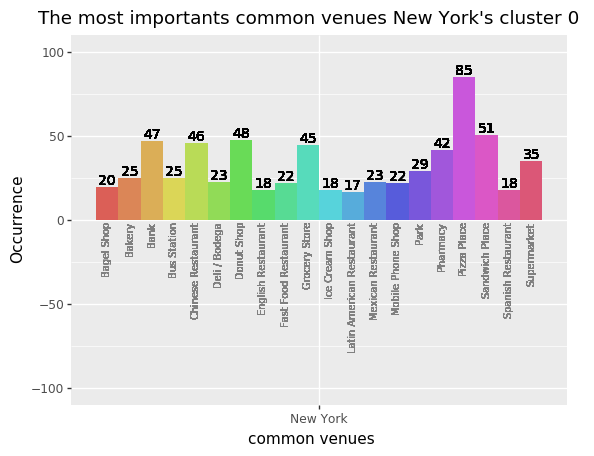

<ggplot: (173808013404)>

In [484]:
import plotnine as p9
from plotnine import coord_flip,theme_classic, position_dodge,lims, ggplot, aes, theme, element_text, geom_line, geom_point, geom_bar, ggtitle, geom_text,scale_x_discrete, xlab,ylab, xlim, ylim, geom_hline
data_diagnostique = analysis_approach_1[(analysis_approach_1.City=="New York")&(analysis_approach_1["Cluster Labels"]==0)].sort_values("Occurrence",ascending=False).reset_index(drop=True)
indice = data_diagnostique[["City_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
data_diagnostique = data_diagnostique.merge(indice)
abs_label = data_diagnostique["Common Venue"].tolist()
abs_label_length = np.max([len(i) for i in abs_label])*4
dodge_text = position_dodge(width=.9)
(ggplot(data_diagnostique, aes(x='City', y='Occurrence', fill='Common Venue'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='Common Venue'),
             position=dodge_text,
             color='gray', size=7, angle=90, va='top')
 + geom_text(aes(label='Occurrence'),                                    # new
             position=dodge_text,
             size=10, va='bottom', format_string='{}')
 + lims(y=(-abs_label_length, 100))
 + ggtitle("The most importants common venues New York's cluster 0 ")
 + ylab ("Occurrence")
 + xlab("common venues")
)
